In [1]:
import numpy as np
from tensorized_dp import TensorDP
from envs.gridworld import GridworldEnv

import pandas as pd
import matplotlib.pyplot as plt

from utils.grid_visualization import visualize_value_function

## `GridWorld` 초기화하기

가로로 `nx` 개, 세로로 `ny` 개의 칸을 가진 `GridworldEnv`를 만듭니다!

In [2]:
nx = 5
ny = 5
env = GridworldEnv([nx,ny])

## 동적계획법 '에이전트' 초기화하기

동적 게획법은 원래 `에이전트`라는 개념을 사용하지 않지만, 일반적으로 사용되는 강화학습의 구현 템플릿에 대한 이해를 돕기 위해 `에이전트`라는 개념을 적용하였습니다.

In [3]:
dp_agent = TensorDP()
dp_agent.set_env(env)

Tensor DP agent initialized
Environment spec:  Num. state = 25 | Num. actions = 4 


## Tensorized Policy evaluation

Tensorized syncrhonous Policy evaluation

```python
def policy_evaluation(self, policy=None, v_init=None):
    """
    :param policy: policy to evaluate (optional)
    :param v_init: initial value 'guesstimation' (optional)
    :return: v_pi: value function of the input policy
    """
    if policy is None:
        policy = self.policy

    r_pi = self.get_r_pi(policy)  # [num. states x 1]
    p_pi = self.get_p_pi(policy)  # [num. states x num. states]

    if v_init is None:
        v_old = np.zeros(self.ns)
    else:
        v_old = v_init

    while True:
        # perform bellman expectation back
        v_new = r_pi + self.gamma * np.matmul(p_pi, v_old)

        # check convergence
        bellman_error = np.linalg.norm(v_new - v_old)
        if bellman_error <= self.error_tol:
            break
        else:
            v_old = v_new
    return v_new
```

```python
def get_r_pi(self, policy):
    r_pi = (policy * self.R).sum(axis=-1)  # [num. states x 1]
    return r_pi

def get_p_pi(self, policy):
    p_pi = np.einsum("na,anm->nm", policy, self.P)  # [num. states x num. states]
    return p_pi
```

## 랜덤 정책함수로 `dp_agent`의 정책 초기화하기

랜덤 정책함수로 `dp_agent` 의 정책함수를 초기화 하였습니다. 한번 확인해볼까요?

In [4]:
policy_state_dim = dp_agent.policy.shape[0]
policy_action_dim = dp_agent.policy.shape[1]
print("===== 정책함수 스펙 =====")
print("state dimension: {}".format(policy_state_dim))
print("action dimension: {} \n".format(policy_action_dim))

print("===== 정책함수 =====")
print(dp_agent.policy)

===== 정책함수 스펙 =====
state dimension: 25
action dimension: 4 

===== 정책함수 =====
[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


## 랜덤 정책함수 평가하기

앞서 정의한 `policy_evaluation()` 를 활용해 현재 정책인 랜덤 정책에 대한 가치 함수를 추산합니다.

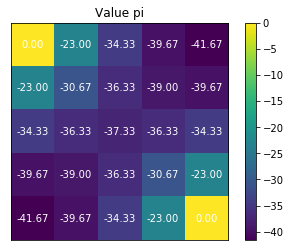

In [5]:
v_pi = dp_agent.policy_evaluation()
fig, ax = plt.subplots(1,1)
visualize_value_function(ax, v_pi, nx, ny)
_ = ax.set_title("Value pi")

## 정책 개선

`policy_improvement()` 를 활용해 greedy policy improvement 를 수행합니다.

In [6]:
p_new = dp_agent.policy_improvement()
dp_agent.set_policy(p_new) # DP agent 의 정책을 개선된 정책 `p_new`로 설정

### 개선된 정책 확인하기

In [7]:
policy_state_dim = dp_agent.policy.shape[0]
policy_action_dim = dp_agent.policy.shape[1]
print("===== 정책함수 스펙 =====")
print("state dimension: {}".format(policy_state_dim))
print("action dimension: {} \n".format(policy_action_dim))

print("===== 정책함수 =====")
print(dp_agent.policy)

===== 정책함수 스펙 =====
state dimension: 25
action dimension: 4 

===== 정책함수 =====
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


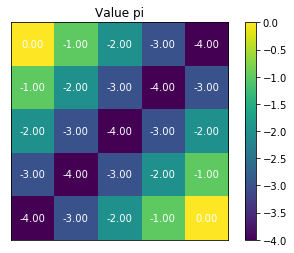

In [8]:
v_pi = dp_agent.policy_evaluation()
fig, ax = plt.subplots(1,1)
visualize_value_function(ax, v_pi, nx, ny)
_ = ax.set_title("Value pi")